# **1. Perkenalan Dataset**

Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari sumber pada modul pembelajaran Data science Dicoding


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from feature_engine.outliers import Winsorizer
from feature_engine.selection import DropCorrelatedFeatures
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbalancedPipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler

# 3. Memuat Dataset

In [2]:
df = pd.read_csv("../data.csv",sep=";")
df.head()
df.columns

Index(['Marital_status', 'Application_mode', 'Application_order', 'Course',
       'Daytime_evening_attendance', 'Previous_qualification',
       'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification',
       'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation',
       'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_credited',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_1st_sem_without_evaluations',
       'Curricular_units_2nd_sem_credited',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_evaluations',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Curricular_units_2nd_sem_wit

# 4. Exploratory Data Analysis (EDA)

In [3]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

sns.set(style="whitegrid")

# --- Setup ---
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

UNIVARIATE ANALYSIS


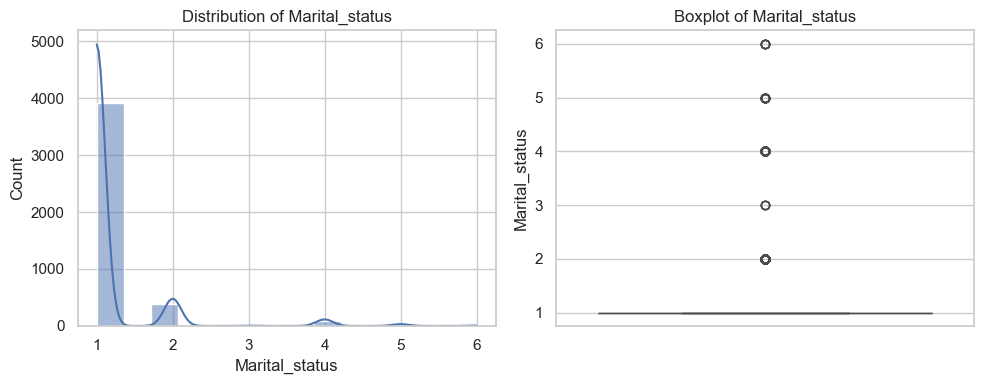

Stats for Marital_status:
count    4424.000000
mean        1.178571
std         0.605747
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         6.000000
Name: Marital_status, dtype: float64
Skewness: 4.40


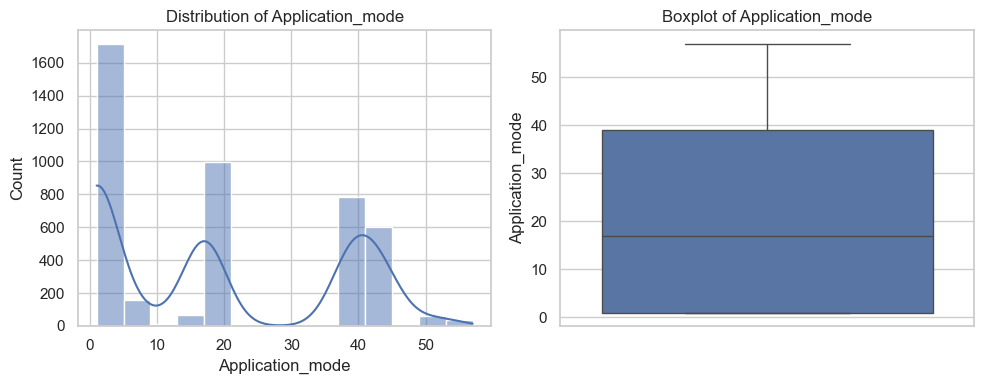

Stats for Application_mode:
count    4424.000000
mean       18.669078
std        17.484682
min         1.000000
25%         1.000000
50%        17.000000
75%        39.000000
max        57.000000
Name: Application_mode, dtype: float64
Skewness: 0.39


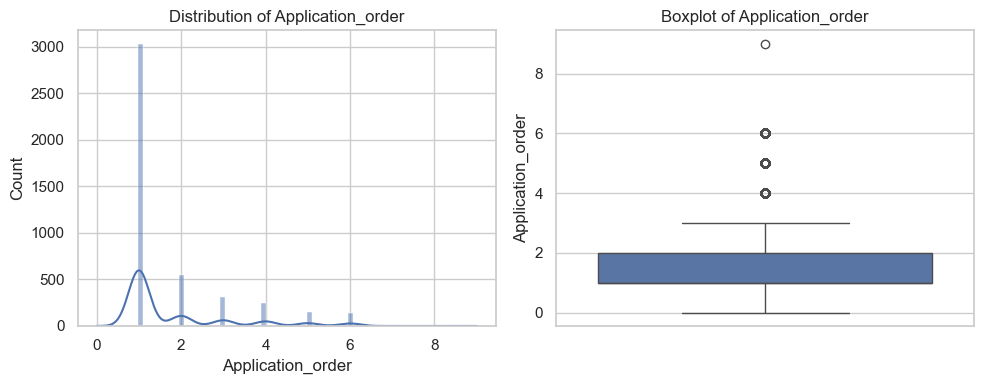

Stats for Application_order:
count    4424.000000
mean        1.727848
std         1.313793
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: Application_order, dtype: float64
Skewness: 1.88


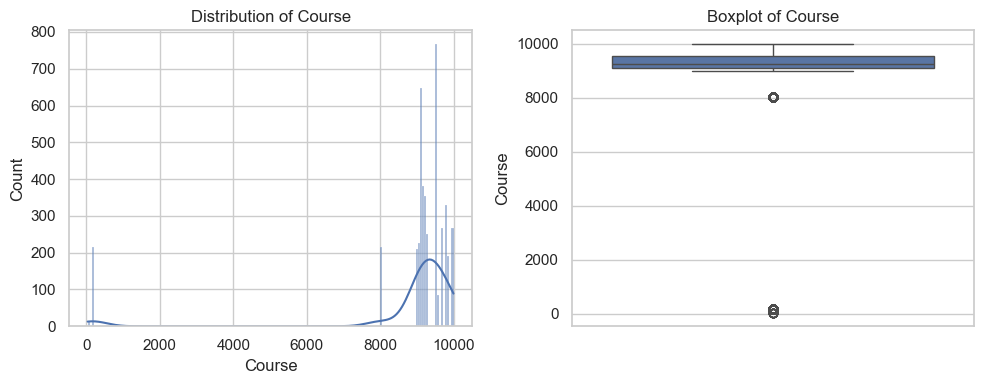

Stats for Course:
count    4424.000000
mean     8856.642631
std      2063.566416
min        33.000000
25%      9085.000000
50%      9238.000000
75%      9556.000000
max      9991.000000
Name: Course, dtype: float64
Skewness: -3.81


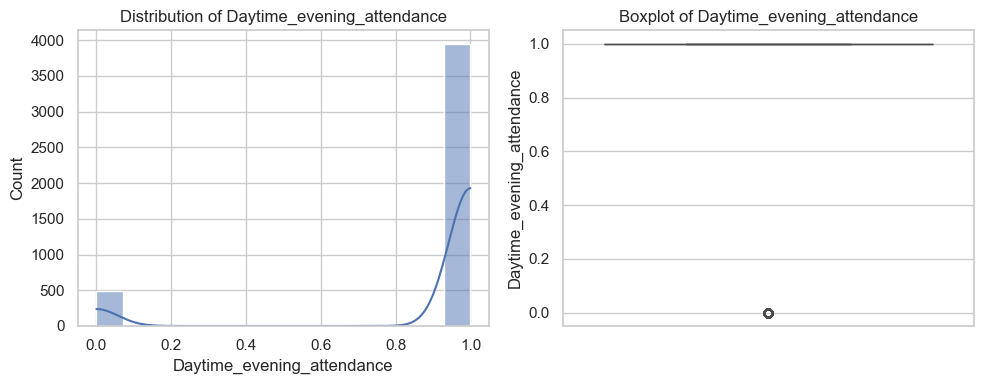

Stats for Daytime_evening_attendance:
count    4424.000000
mean        0.890823
std         0.311897
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Daytime_evening_attendance, dtype: float64
Skewness: -2.51


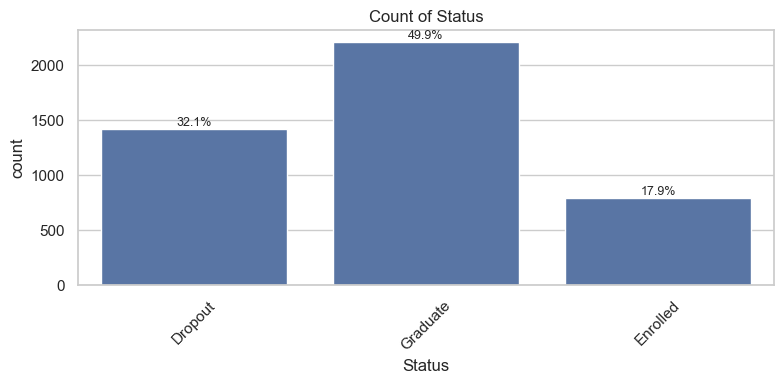

In [4]:


# ==============================
# 1. UNIVARIATE ANALYSIS
# ==============================

print("UNIVARIATE ANALYSIS\n" + "="*60)

# Numerical Features (limit to 5 for speed)
for col in numerical_features[:5]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], kde=True, ax=axes[0])
    axes[0].set_title(f'Distribution of {col}')
    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

    print(f"Stats for {col}:\n{df[col].describe()}")
    print(f"Skewness: {df[col].skew():.2f}\n{'='*60}")

# Categorical Features (limit to 5)
for col in categorical_features[:5]:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(x=col, data=df)
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{100*height/total:.1f}%', 
                    (p.get_x() + p.get_width()/2, height), 
                    ha='center', va='bottom', fontsize=9)
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

BIVARIATE ANALYSIS


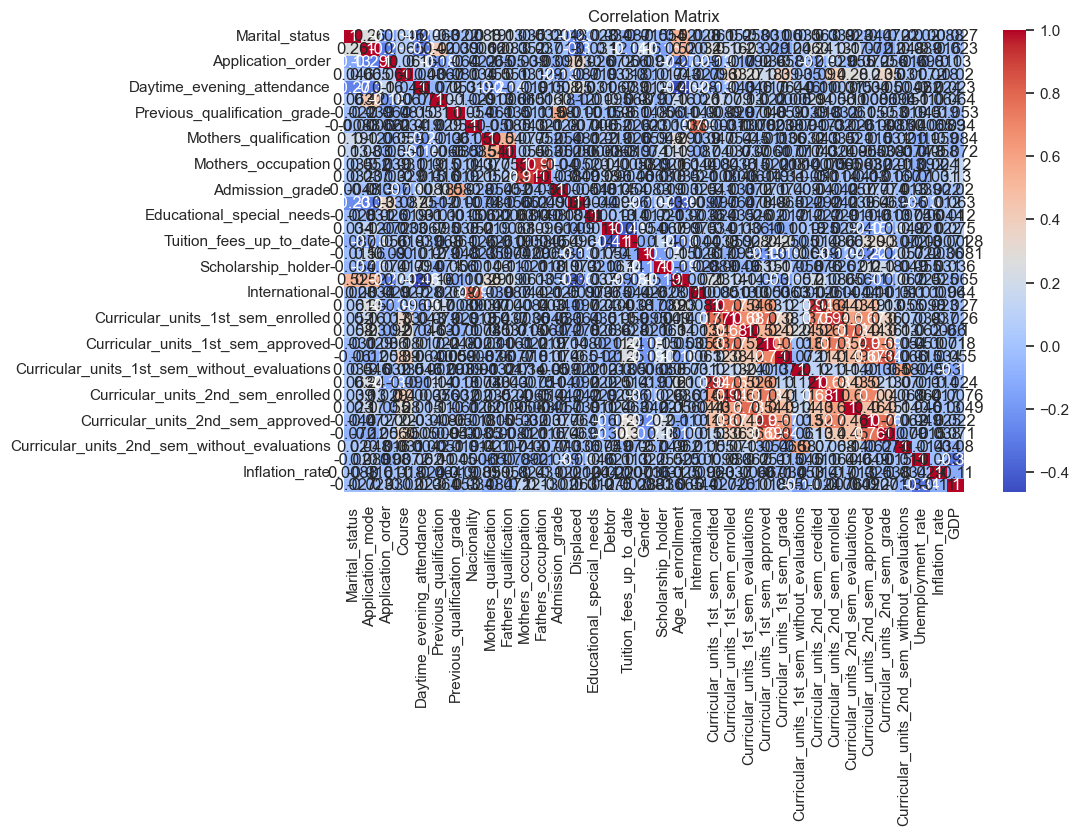

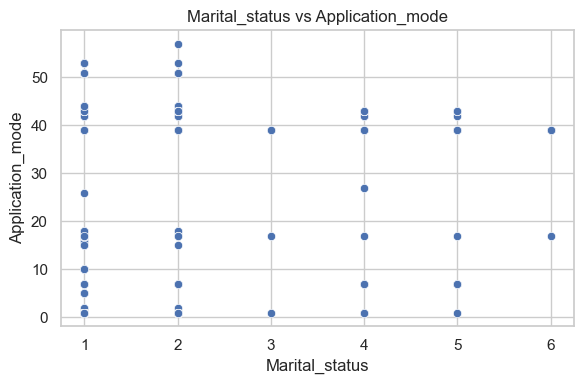

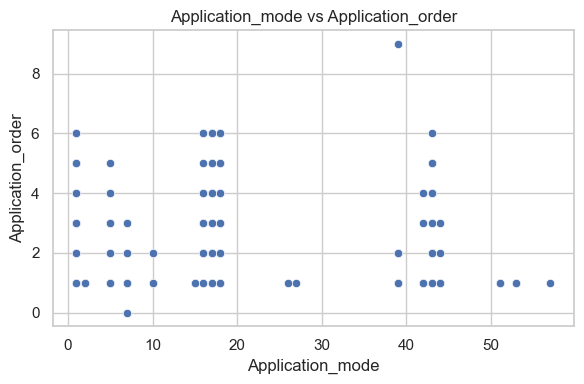

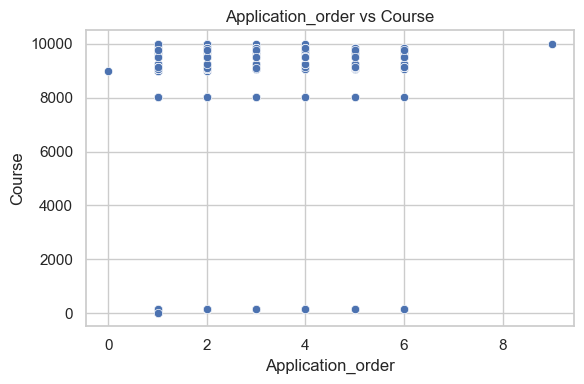

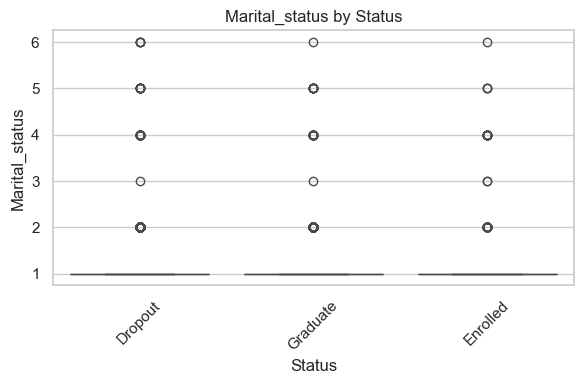

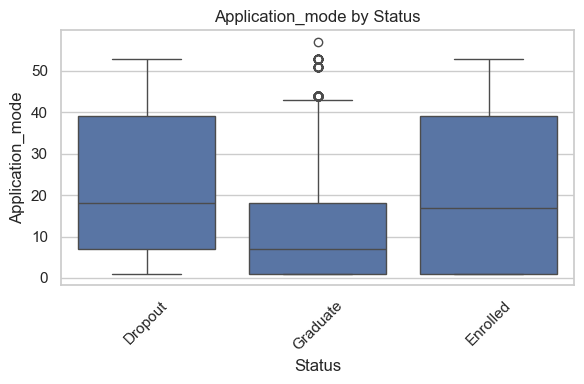

In [5]:


# ==============================
# 2. BIVARIATE ANALYSIS
# ==============================

print("BIVARIATE ANALYSIS\n" + "="*60)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Numerical vs Numerical (first 3 pairs only)
for a, b in zip(numerical_features, numerical_features[1:4]):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[a], y=df[b])
    plt.title(f'{a} vs {b}')
    plt.tight_layout()
    plt.show()

# Categorical vs Numerical (limit)
for cat in categorical_features[:2]:
    for num in numerical_features[:2]:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=cat, y=num, data=df)
        plt.title(f'{num} by {cat}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

# Categorical vs Categorical (only first 2)
if len(categorical_features) >= 2:
    ct = pd.crosstab(df[categorical_features[0]], df[categorical_features[1]])
    sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{categorical_features[0]} vs {categorical_features[1]}')
    plt.tight_layout()
    plt.show()

MULTIVARIATE ANALYSIS


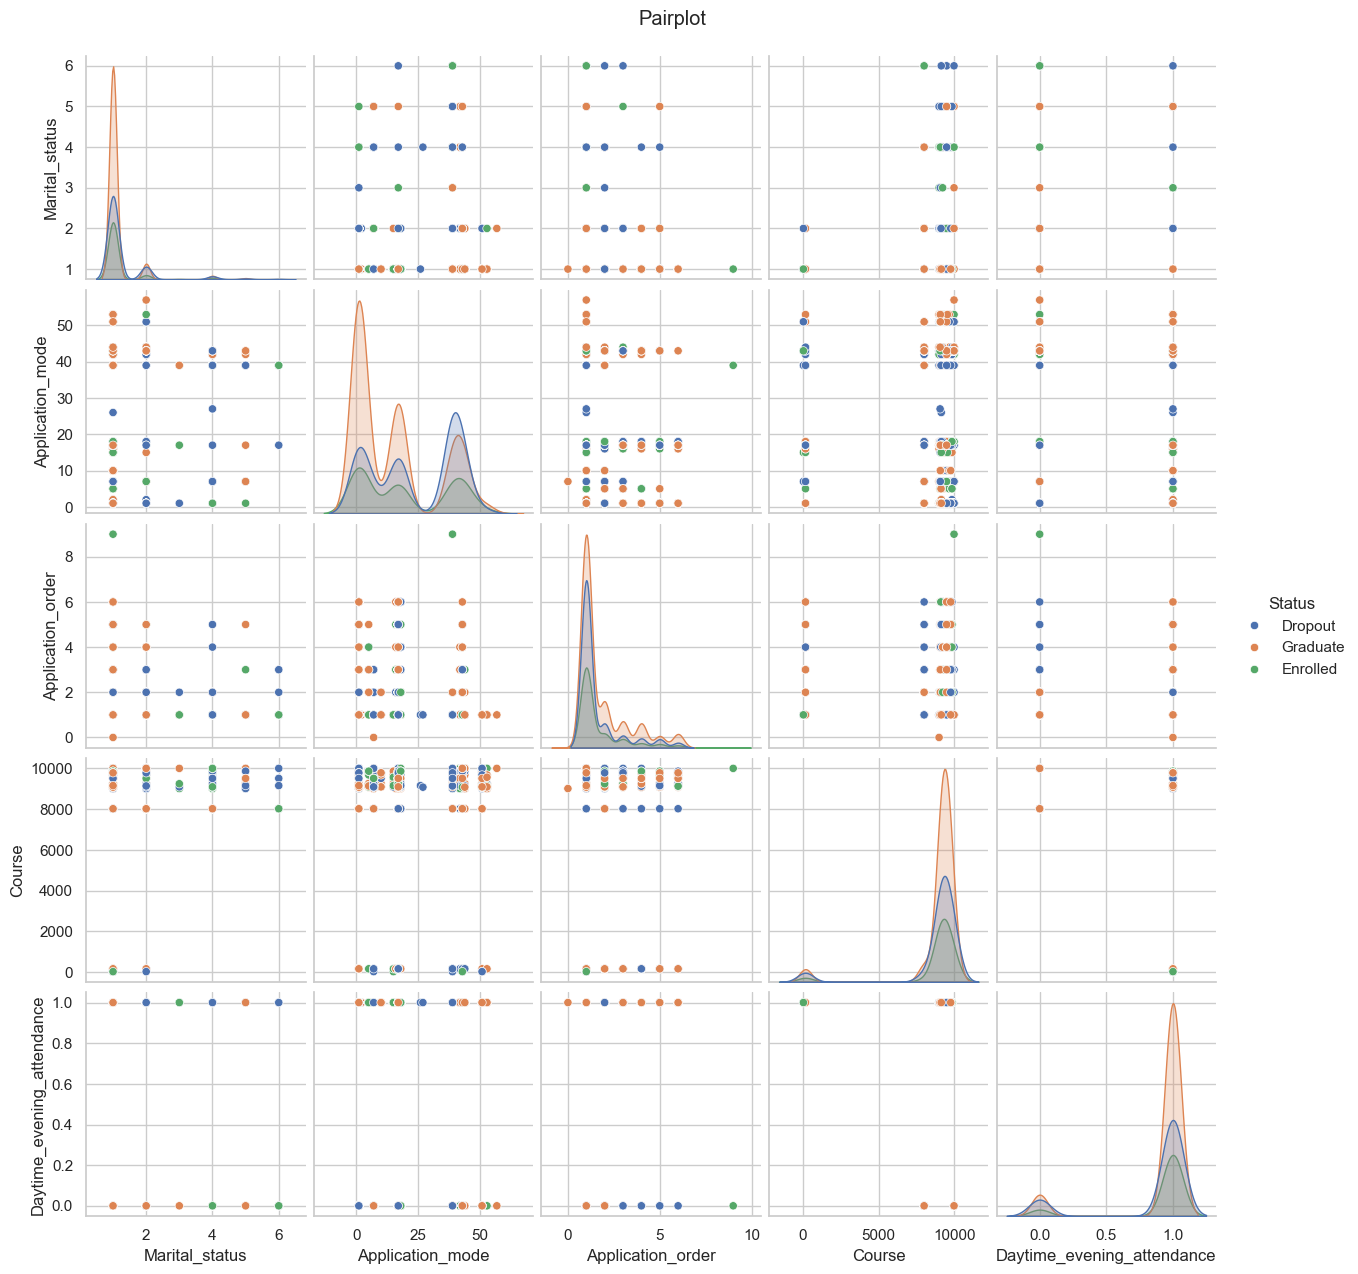

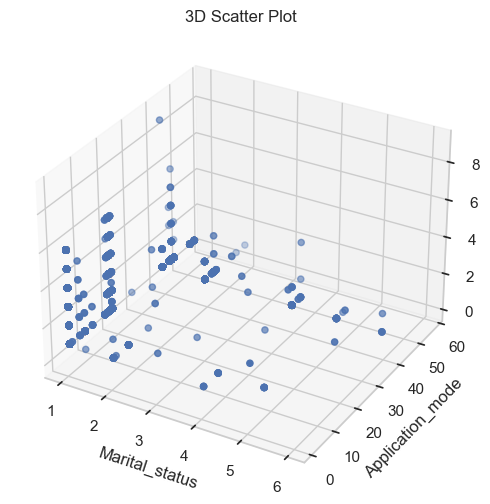

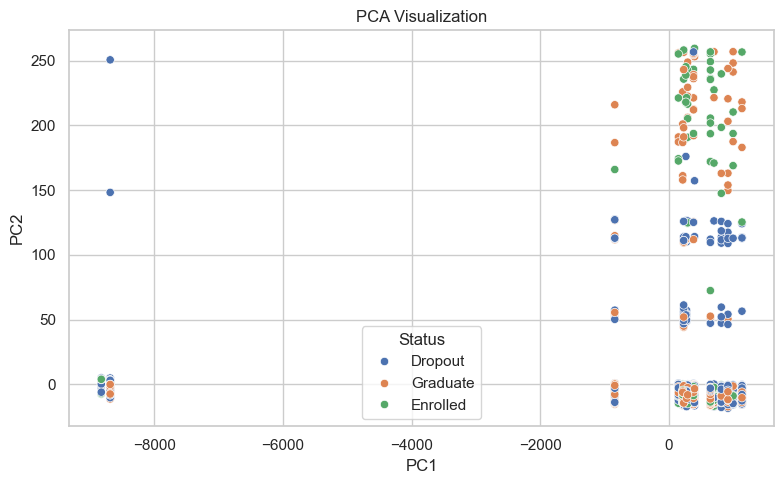

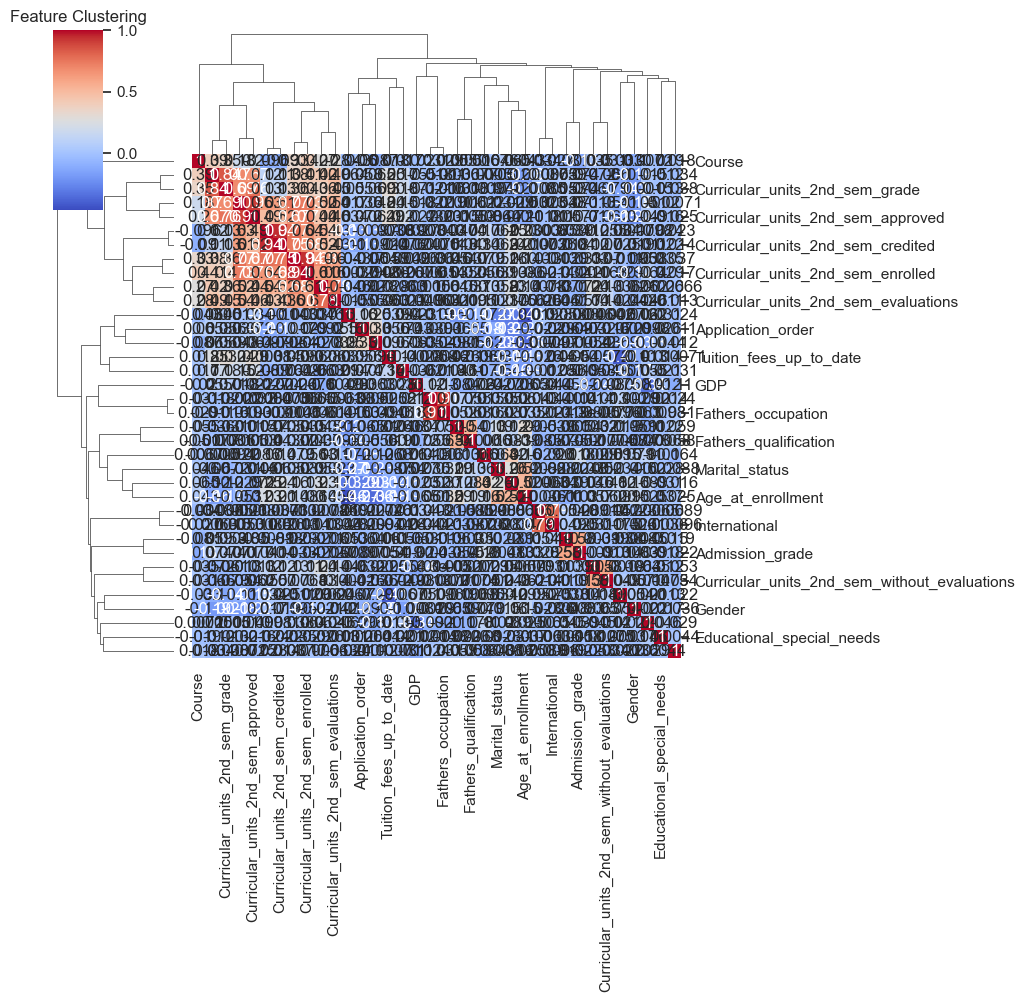

In [6]:


# ==============================
# 3. MULTIVARIATE ANALYSIS
# ==============================

print("MULTIVARIATE ANALYSIS\n" + "="*60)

# Pairplot (limit to 5 numerical features)
sns.pairplot(df[numerical_features[:5] + categorical_features[:1]], 
             hue=categorical_features[0] if categorical_features else None,
             diag_kind='kde')
plt.suptitle('Pairplot', y=1.02)
plt.show()

# 3D Scatter (first 3 numerical features)
if len(numerical_features) >= 3:
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[numerical_features[0]], df[numerical_features[1]], df[numerical_features[2]])
    ax.set_xlabel(numerical_features[0])
    ax.set_ylabel(numerical_features[1])
    ax.set_zlabel(numerical_features[2])
    plt.title('3D Scatter Plot')
    plt.show()

# PCA Visualization
if len(numerical_features) > 2:
    pca = PCA(n_components=2)
    pc = pca.fit_transform(df[numerical_features].fillna(df[numerical_features].mean()))
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=pc[:,0], y=pc[:,1], hue=df[categorical_features[0]] if categorical_features else None)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("PCA Visualization")
    plt.tight_layout()
    plt.show()

# Clustermap
sns.clustermap(df[numerical_features].corr(), cmap='coolwarm', annot=True)
plt.title("Feature Clustering")
plt.show()


# 5. Data Preprocessing

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:
# Cek jumlah missing values
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [8]:
# Contoh penanganan: isi missing numerical dengan median, kategorikal dengan modus
for col in df.select_dtypes(include='number'):
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\hrahm\AppData\Local\Temp\ipykernel_35392\3912759097.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\hrahm\AppData\Local\Temp\ipykernel_35392\3912759097.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [9]:
# Cek duplikasi
df.duplicated().sum()


0

In [10]:
# Hapus baris duplikat
df = df.drop_duplicates()


In [11]:
from sklearn.preprocessing import RobustScaler

# Pilih fitur numerik
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Scaling
scaler = RobustScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [12]:
winsor = Winsorizer(capping_method='gaussian', tail='both', fold=3, variables=numerical_cols)
df[numerical_cols] = winsor.fit_transform(df[numerical_cols])


In [13]:
from sklearn.preprocessing import OneHotEncoder

# Pilih kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Lakukan encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [14]:
df_encoded['age_group'] = pd.cut(df_encoded['Age_at_enrollment'], 
                                 bins=[0, 18, 45, 100], 
                                 labels=["Young", "Adult", "Senior"])


In [15]:
def auto_detect_feature_types(df, target=None, ordinal_candidates=None):
    """
    Deteksi otomatis fitur biner, ordinal, dan kontinu dari DataFrame.
    - ordinal_candidates: list nama kolom yang ingin diperlakukan sebagai ordinal (opsional)
    """
    if target and target in df.columns:
        features = df.drop(columns=[target])
    else:
        features = df.copy()
    
    binary_features = [col for col in features.columns 
                       if features[col].nunique() == 2 and pd.api.types.is_numeric_dtype(features[col])]
    continuous_features = [col for col in features.columns 
                          if pd.api.types.is_numeric_dtype(features[col]) and features[col].nunique() > 10]
    ordinal_features = []
    if ordinal_candidates:
        ordinal_features = [col for col in ordinal_candidates if col in features.columns]
        # Remove ordinal from continuous if overlap
        continuous_features = [col for col in continuous_features if col not in ordinal_features]
    
    # Categorical non-binary
    categorical_features = [col for col in features.select_dtypes(include='object').columns]
    
    return {
        "binary": binary_features,
        "ordinal": ordinal_features,
        "continuous": continuous_features,
        "categorical": categorical_features
    }

# Contoh penggunaan:
ordinal_candidates = []  # atau isi dengan nama kolom ordinal, misal: ["Age_at_enrollment", "Admission_grade"]
feature_types = auto_detect_feature_types(df, target="Diabetes_012", ordinal_candidates=ordinal_candidates)

print("Binary features:", feature_types["binary"])
print("Ordinal features:", feature_types["ordinal"])
print("Continuous features:", feature_types["continuous"])
print("Categorical features:", feature_types["categorical"])

Binary features: ['Daytime_evening_attendance', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
Ordinal features: []
Continuous features: ['Application_mode', 'Course', 'Previous_qualification', 'Previous_qualification_grade', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade']
Categorical features: ['Status']


In [16]:
# Split data into training and testing sets
X = df.drop("Status", axis=1)
y = df["Status"]

# Stratified split to maintain target distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Data split: Training {X_train.shape}, Test {X_test.shape}")
print(f"Training target distribution:\n{y_train.value_counts(normalize=True).round(3)}")

Data split: Training (3539, 36), Test (885, 36)
Training target distribution:
Status
Graduate    0.499
Dropout     0.321
Enrolled    0.179
Name: proportion, dtype: float64


In [17]:
# Remove columns with low variation for IQR winsorization
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import OneHotEncoder

low_var_cols = ['Previous_qualification', 'Nacionality', 'Curricular_units_1st_sem_credited', 
                'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited']

winsorize_columns = [col for col in feature_types["continuous"] if col not in low_var_cols]

# Define the preprocessing steps using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        (
            "continuous_pipeline",
            Pipeline(
                [
                    (
                        "winsorize",
                        Winsorizer(
                            capping_method="iqr",
                            fold=1.5,
                            variables=winsorize_columns,
                        ),
                    ),
                    ("scaler", RobustScaler()),
                ]
            ),
            winsorize_columns,
        ),
        ("ordinal_scaler", RobustScaler(), feature_types["ordinal"]),
        ("binary_passthrough", "passthrough", feature_types["binary"]),
        # Remove 'Status' from categorical features for encoding, since it's the target and not in X_train/X_test
        ("cat_encoder", OneHotEncoder(handle_unknown="ignore"), [col for col in feature_types["categorical"] if col in X_train.columns]),
    ],
    remainder="drop",
)

# Create the full pipeline including preprocessing, feature selection, and SMOTE
pipeline = ImbalancedPipeline(
    [
        ("preprocess", preprocessor),
        ("feature_selection", DropCorrelatedFeatures(threshold=0.8, method="pearson")),
        ("smote", SMOTE(random_state=42, sampling_strategy="auto")),
    ]
)

# Apply the pipeline to training data (with SMOTE)
print("Applying preprocessing and SMOTE to training data...")
X_train_processed, y_train_processed = pipeline.fit_resample(X_train, y_train)

# Apply only preprocessing and feature selection (without SMOTE)
X_test_processed = pipeline[:-1].transform(X_test)

# Get the final feature names after all transformations and selections
final_feature_names = pipeline.named_steps["feature_selection"].get_feature_names_out()

print(f"Preprocessing complete. Training data shape: {X_train_processed.shape}")
print(f"Test data shape: {X_test_processed.shape}")
print(
    f"Training target distribution after SMOTE:\n{pd.Series(y_train_processed).value_counts(normalize=True).round(3)}"
)
print(f"Number of final features: {len(final_feature_names)}")

Applying preprocessing and SMOTE to training data...
Preprocessing complete. Training data shape: (5301, 22)
Test data shape: (885, 22)
Training target distribution after SMOTE:
Status
Graduate    0.333
Dropout     0.333
Enrolled    0.333
Name: proportion, dtype: float64
Number of final features: 22


In [18]:
# Save processed data to CSV files
output_dir = Path("Graduate_indicators_preprocessing")
output_dir.mkdir(exist_ok=True)

train_final_df = pd.DataFrame(X_train_processed, columns=final_feature_names)
train_final_df["Status"] = y_train_processed

test_final_df = pd.DataFrame(X_test_processed, columns=final_feature_names)
test_final_df["Status"] = y_test.reset_index(drop=True)

train_final_df.to_csv(output_dir / "train_processed.csv", index=False)
test_final_df.to_csv(output_dir / "test_processed.csv", index=False)

print(f"Processed data saved to '{output_dir}/'.")
print(
    f"Train data saved: '{output_dir / 'train_processed.csv'}' ({train_final_df.shape})"
)
print(f"Test data saved: '{output_dir / 'test_processed.csv'}' ({test_final_df.shape})")

Processed data saved to 'Graduate_indicators_preprocessing/'.
Train data saved: 'Graduate_indicators_preprocessing\train_processed.csv' ((5301, 23))
Test data saved: 'Graduate_indicators_preprocessing\test_processed.csv' ((885, 23))


In [19]:
df = pd.read_csv("Graduate_indicators_preprocessing/train_processed.csv")
print("Processed training data preview:")
print(df.head())

Processed training data preview:
         x0        x1        x2        x3        x4   x5   x6        x7  \
0  0.684211  0.000000 -0.873333 -0.485714 -0.529412 -0.8 -1.0 -0.432749   
1  0.578947 -0.229299  0.000000 -0.514286 -0.529412  2.3 -1.2 -0.350877   
2  0.710526 -0.498938  0.460000 -0.514286  0.558824  0.8 -0.2  0.818713   
3 -0.026316 -0.356688 -0.540000 -0.514286 -0.529412 -0.2 -0.6 -0.304094   
4  0.000000  0.556263  0.593333  0.514286  0.529412  0.0 -0.4  0.309942   

         x8   x10  ...   x14  x17  x18  x19  x20  x21  x22  x23  x24    Status  
0  0.166667  1.50  ...  1.25  0.0 -1.0  0.0  0.0  0.0  1.0  0.0  0.0  Graduate  
1  2.333333 -0.75  ... -0.75  0.0  0.0  0.0  1.0 -1.0  1.0  0.0  0.0   Dropout  
2  0.166667  1.25  ...  1.75  0.0 -1.0  0.0  0.0  0.0  1.0  0.0  0.0  Enrolled  
3 -0.333333 -0.50  ... -0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Graduate  
4 -0.166667  0.00  ...  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  Graduate  

[5 rows x 23 columns]
